In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./data/mobile_price_classification.csv")

In [3]:
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1.0,0,7,0.6,188.0,...,20,756,2549.0,9,7,19,0,0,1,1
1,2,1021,1,0.5,1,NaN,1,53,0.7,136.0,...,905,1988,NaN,17,3,7,1,1,0,2
2,3,563,1,0.5,1,2.0,1,41,0.9,NaN,...,1263,1716,2603.0,11,2,9,1,1,0,2
3,4,615,1,2.5,0,NaN,0,10,0.8,131.0,...,1216,1786,2769.0,16,8,11,1,0,0,2
4,5,1821,1,1.2,0,13.0,1,44,NaN,141.0,...,1208,1212,1411.0,8,2,15,1,1,0,1


In [4]:
data.shape

(2002, 22)

In [5]:
data.columns

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.drop("id", axis=1, inplace=True)

In [7]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2002.000000,2002.000000,2002.000000,2002.000000,1995.000000,2002.000000,2002.000000,1997.000000,1996.000000,2002.000000,...,2002.000000,2002.000000,2000.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,1238.485514,0.494505,1.522428,0.509491,4.319799,0.521479,32.037463,0.502053,141.289579,4.520979,...,644.652847,1251.457043,2128.750000,12.306194,5.767732,11.008492,0.761738,0.502498,0.506494,1.499500
std,439.389628,0.500095,0.815769,0.500035,4.341836,0.499663,18.144296,0.288578,45.313271,2.287617,...,443.792863,431.988140,1096.826623,4.212218,4.354540,5.462372,0.426126,0.500119,0.500083,1.117866
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,875.250000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1226.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2145.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,946.750000,1632.750000,3069.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,960.000000,8.000000,...,1960.000000,1998.000000,7286.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
data = data.rename(
    columns={
        "blue": "bluetooth",
        "fc": "fc_megapixel",
        "pc": "pc_megapixel",
        "m_dep": "m_depth"
    })

In [9]:
dupes = data.duplicated()
dupes.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [10]:
sum(dupes)

2

In [11]:
data = data.drop_duplicates()

In [12]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [13]:
data.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     7
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [14]:
data["fc_megapixel"] = data["fc_megapixel"].fillna(0)
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              2
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
len(data["ram"].unique())

1562

In [16]:
data["ram"] = data["ram"].fillna(method="backfill")

len(data["ram"].unique())

1561

In [17]:
data.isna().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          5
mobile_wt        6
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [18]:
data["mobile_wt"] = data["mobile_wt"].fillna(data["mobile_wt"].median())

In [19]:
data["mobile_wt"].head()

0    188.0
1    136.0
2    141.0
3    131.0
4    141.0
Name: mobile_wt, dtype: float64

In [20]:
data = data.dropna()

In [21]:
data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc_megapixel     0
four_g           0
int_memory       0
m_depth          0
mobile_wt        0
n_cores          0
pc_megapixel     0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [22]:
data.shape

(1995, 21)

In [23]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc_megapixel',
       'four_g', 'int_memory', 'm_depth', 'mobile_wt', 'n_cores',
       'pc_megapixel', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [24]:
data.to_csv("mobile_data_cleaned.csv", index=False)

***

In [25]:
numeric_data = data.drop([
    "bluetooth", "dual_sim", "four_g", "three_g", "touch_screen", "wifi",
    "price_range"
],
                         axis=1)

numeric_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1.0,7,0.6,188.0,2,2,20,756,2549.0,9,7,19
1,1021,0.5,0.0,53,0.7,136.0,3,6,905,1988,2603.0,17,3,7
2,563,0.5,2.0,41,0.9,141.0,5,6,1263,1716,2603.0,11,2,9
3,615,2.5,0.0,10,0.8,131.0,6,9,1216,1786,2769.0,16,8,11
5,1859,0.5,3.0,22,0.7,164.0,1,7,1004,1654,1067.0,17,1,10


In [26]:
categorical_data = data[[
    "bluetooth", "dual_sim", "four_g", "three_g", "touch_screen", "wifi",
    "price_range"
]]

categorical_data.head()

,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
5,0,1,0,1,0,0,1


In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:ylabel='ram'>

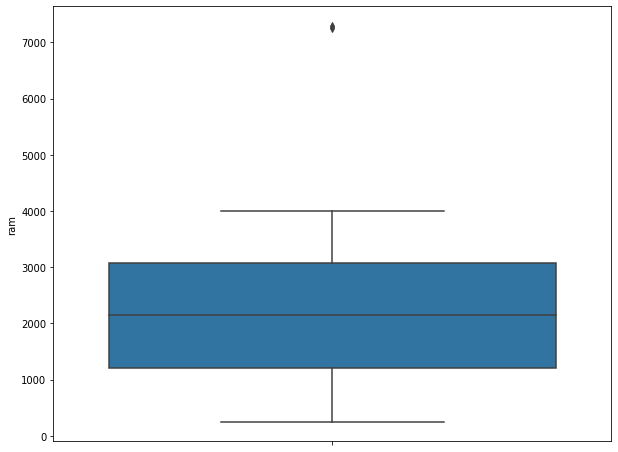

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(y=numeric_data["ram"])

<AxesSubplot:ylabel='mobile_wt'>

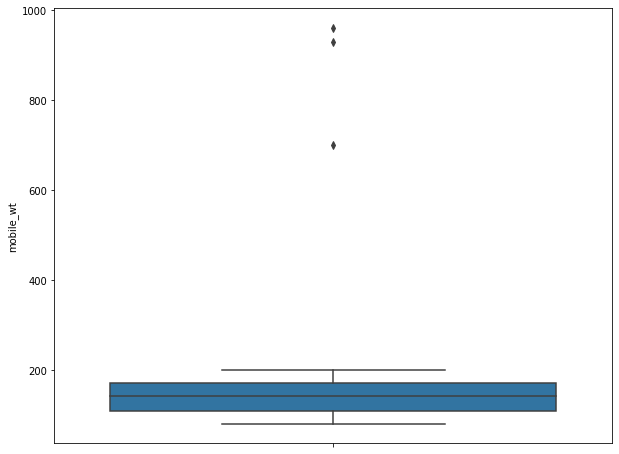

In [29]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(y=numeric_data["mobile_wt"])

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

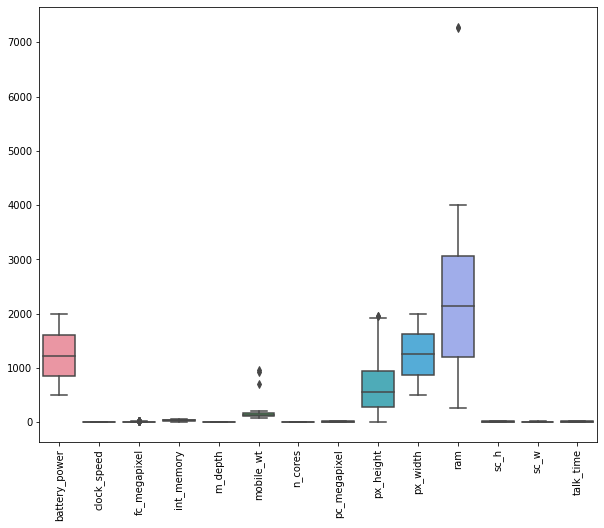

In [30]:
fig, ax = plt.subplots(figsize=(10, 8))

bp = sns.boxplot(data=numeric_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()

In [33]:
scaled_array = scaler.fit_transform(numeric_data)

In [34]:
scaled_data = pd.DataFrame(scaled_array, columns=numeric_data.columns)
scaled_data.head()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,-1.145740,0.383289,-0.787860,0.281262,1.461538
1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,1.703940,0.432536,1.112147,-0.636722,-0.734484
2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,1.074790,0.432536,-0.312858,-0.866218,-0.368480
3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,1.236704,0.583926,0.874646,0.510758,-0.002477
4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,0.931381,-0.968275,1.112147,-1.095714,-0.185479


In [35]:
scaled_data.describe()

,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03,1.995000e+03
mean,-1.495879e-16,1.068485e-16,7.123235e-18,-1.210950e-16,1.246566e-17,-7.390357e-17,1.798617e-16,1.282182e-16,-8.904044e-17,-2.341764e-16,2.849294e-17,1.104101e-16,6.321871e-17,-4.630103e-17
std,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00,1.000251e+00
min,-1.679377e+00,-1.254710e+00,-9.913549e-01,-1.654543e+00,-1.394222e+00,-1.351975e+00,-1.537835e+00,-1.635022e+00,-1.455654e+00,-1.737881e+00,-1.707896e+00,-1.737864e+00,-1.325210e+00,-1.649493e+00
25%,-8.799334e-01,-1.009616e+00,-7.609013e-01,-8.832348e-01,-1.047448e+00,-7.117106e-01,-6.633928e-01,-8.106517e-01,-8.174790e-01,-8.727999e-01,-8.405968e-01,-7.878601e-01,-8.662179e-01,-9.174857e-01
50%,-3.038194e-02,-2.923931e-02,-2.999940e-01,-1.739793e-03,-7.126678e-03,-5.212416e-03,-2.261716e-01,1.371885e-02,-1.815634e-01,-1.003134e-02,1.575839e-02,-7.535743e-02,-1.777300e-01,-2.476716e-03
75%,8.567502e-01,8.285904e-01,6.218205e-01,8.797552e-01,1.033195e+00,6.350516e-01,1.085492e+00,8.380894e-01,6.802548e-01,8.828069e-01,8.556979e-01,8.746462e-01,7.402540e-01,9.125322e-01
max,1.730217e+00,1.808967e+00,3.387264e+00,1.761250e+00,1.726742e+00,1.807673e+01,1.522713e+00,1.662460e+00,2.972036e+00,1.727071e+00,4.703368e+00,1.587149e+00,2.805718e+00,1.644539e+00


[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

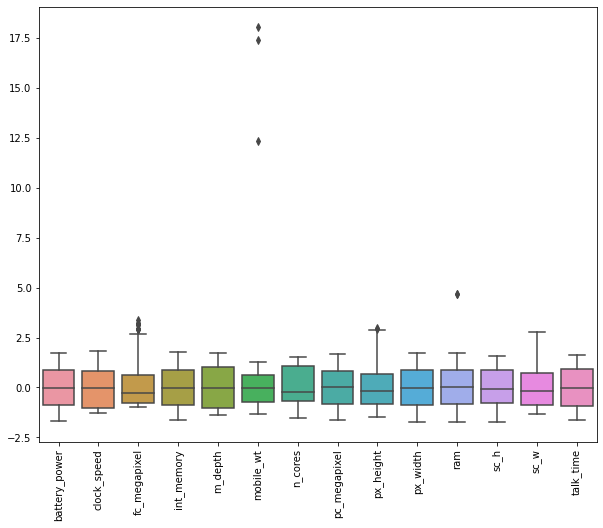

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))

bp = sns.boxplot(data=scaled_data)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

In [37]:
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1

print(IQR)

battery_power     762.5
clock_speed         1.5
fc_megapixel        6.0
int_memory         32.0
m_depth             0.6
mobile_wt          61.0
n_cores             4.0
pc_megapixel       10.0
px_height         663.0
px_width          759.0
ram              1860.0
sc_h                7.0
sc_w                7.0
talk_time          10.0
dtype: float64


In [38]:
outliers_removed = numeric_data[~ ((numeric_data < (Q1 - 1.5 * IQR)) \
                                  | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]
outliers_removed.shape

(1971, 14)

[Text(0, 0, 'battery_power'),
 Text(1, 0, 'clock_speed'),
 Text(2, 0, 'fc_megapixel'),
 Text(3, 0, 'int_memory'),
 Text(4, 0, 'm_depth'),
 Text(5, 0, 'mobile_wt'),
 Text(6, 0, 'n_cores'),
 Text(7, 0, 'pc_megapixel'),
 Text(8, 0, 'px_height'),
 Text(9, 0, 'px_width'),
 Text(10, 0, 'ram'),
 Text(11, 0, 'sc_h'),
 Text(12, 0, 'sc_w'),
 Text(13, 0, 'talk_time')]

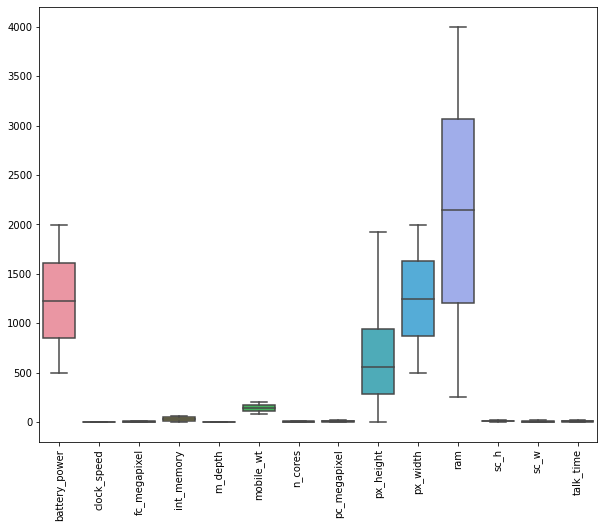

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))

bp = sns.boxplot(data=outliers_removed)

bp.set_xticklabels(bp.get_xticklabels(), rotation=90)

***

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
scaled_data = scaled_data.reset_index()

In [42]:
categorical_data = categorical_data.reset_index()

In [43]:
final_df = pd.concat([scaled_data, categorical_data], axis=1)
final_df.head()

,index,battery_power,clock_speed,fc_megapixel,int_memory,m_depth,mobile_wt,n_cores,pc_megapixel,px_height,...,sc_w,talk_time,index,bluetooth,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,-0.902710,0.828590,-0.760901,-1.379076,0.339647,1.032457,-1.100614,-1.305274,-1.410473,...,0.281262,1.461538,0,0,0,0,0,0,1,1
1,1,-0.495016,-1.254710,-0.991355,1.155222,0.686421,-0.115603,-0.663393,-0.645778,0.588764,...,-0.636722,-0.734484,1,1,1,1,1,1,0,2
2,2,-1.538165,-1.254710,-0.530448,0.494101,1.379968,-0.005212,0.211050,-0.645778,1.397495,...,-0.866218,-0.368480,2,1,1,1,1,1,0,2
3,3,-1.419729,1.196232,-0.991355,-1.213795,1.033195,-0.225993,0.648271,-0.151155,1.291321,...,0.510758,-0.002477,3,1,0,0,1,0,0,2
4,4,1.413628,-1.254710,-0.299994,-0.552674,0.686421,0.502583,-1.537835,-0.480903,0.812408,...,-1.095714,-0.185479,5,0,1,0,1,0,0,1


In [44]:
X = final_df.drop("price_range", axis=1)
y = final_df["price_range"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=101)

In [46]:
X_train.shape, X_test.shape

((1596, 22), (399, 22))

In [47]:
y_train.shape, y_test.shape

((1596,), (399,))

In [50]:
from sklearn.linear_model import LogisticRegression

In [53]:
lm = LogisticRegression(solver="lbfgs",
                        multi_class="multinomial",
                        max_iter=10000)

In [54]:
lm.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [56]:
lm.score(X_test, y_test)

0.9373433583959899